# Assignment_k-means

[-711.3188522095594, -482.5398990071221, -411.62832139210093, -380.85751730030586, -373.70503045378655, -373.421559957829, -379.9237344880036, -380.82589189753014, -374.5264984002684]


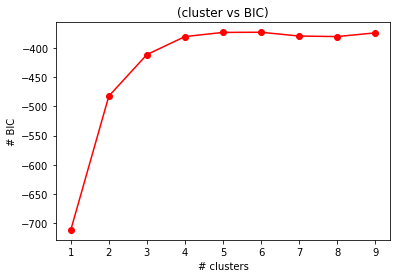

In [1]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

# Importing the dataset
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:,:].values

#Function For Calculating BIC
def compute_bic(kmeans,X):
    
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term
    return(BIC)



ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]
print(BIC)
plt.plot(ks,BIC,'r-o')
plt.title("(cluster vs BIC)")
plt.xlabel("# clusters")
plt.ylabel("# BIC")
           
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)



In [4]:
print (y_kmeans)

[6 1 1 1 6 6 1 1 1 1 6 1 1 1 6 6 6 6 6 6 6 6 1 1 1 1 1 6 6 1 1 6 6 6 1 1 6
 1 1 1 1 1 1 1 6 1 6 1 6 1 4 4 4 0 4 5 4 0 4 0 0 0 0 5 0 4 5 0 5 0 5 0 5 5
 4 4 4 4 5 0 0 0 0 5 0 4 4 5 0 0 0 5 0 0 0 0 0 4 0 0 2 5 2 2 2 3 0 3 2 3 2
 2 2 5 5 2 2 3 3 5 2 5 3 5 2 3 5 5 2 2 3 3 2 5 2 3 2 2 5 2 2 2 5 2 2 2 5 2
 2 5]
